# 03_Analysis of Credit Card Balances
In this notebook I analyze the credit card balance dataset which is described below:
- Monthly balance snapshots of previous credit cards that the applicant has had with Home Credit. Files contain one row for each month where a client has data. The file contains 23 fields.

**Analysis Summary**:
- After analyzing the dataset I created an aggregate table of four functions ('minimum', 'maximum', 'mean','standard deviation') by SK_ID_CURR for each of the availble float64 fields. Each field would have a new column for each of the functions. This created a total of 80 features. By taking this approach I figure there will be many fields available during model selection that can be removed if there feature importance is zero.

In [1]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## 3.1 Import Datasets And Overview data

In [3]:
cc = pd.read_csv(r"C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\credit_card_balance.csv")
FieldsNames = pd.read_csv(r"C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\HomeCredit_columns_description.csv")

In [5]:
# print description of each field in the table
Info = FieldsNames[FieldsNames['Table'] == 'credit_card_balance.csv'] [['Row','Description']]
for i in Info.values.tolist():
    print (i,"\n", "-"*100)

['SK_ID_PREV ', 'ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)'] 
 ----------------------------------------------------------------------------------------------------
['SK_ID_CURR', 'ID of loan in our sample'] 
 ----------------------------------------------------------------------------------------------------
['MONTHS_BALANCE', 'Month of balance relative to application date (-1 means the freshest balance date)'] 
 ----------------------------------------------------------------------------------------------------
['AMT_BALANCE', 'Balance during the month of previous credit'] 
 ----------------------------------------------------------------------------------------------------
['AMT_CREDIT_LIMIT_ACTUAL', 'Credit card limit during the month of the previous credit'] 
 ----------------------------------------------------------------------------------------------------
['AMT_DRAWINGS_ATM_C

In [6]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [8]:
num_col = cc.select_dtypes(["float", "integer"]).columns

In [9]:
cc[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,3840312.0,1.904504e+06,536469.470563,1000018.000,1434385.00,1897122.0,2.369328e+06,2843496.000
SK_ID_CURR,3840312.0,2.783242e+05,102704.475133,100006.000,189517.00,278396.0,3.675800e+05,456250.000
MONTHS_BALANCE,3840312.0,-3.452192e+01,26.667751,-96.000,-55.00,-28.0,-1.100000e+01,-1.000
AMT_BALANCE,3840312.0,5.830016e+04,106307.031024,-420250.185,0.00,0.0,8.904669e+04,1505902.185
AMT_CREDIT_LIMIT_ACTUAL,3840312.0,1.538080e+05,165145.699525,0.000,45000.00,112500.0,1.800000e+05,1350000.000
AMT_DRAWINGS_ATM_CURRENT,3090496.0,5.961325e+03,28225.688578,-6827.310,0.00,0.0,0.000000e+00,2115000.000
AMT_DRAWINGS_CURRENT,3840312.0,7.433388e+03,33846.077333,-6211.620,0.00,0.0,0.000000e+00,2287098.315
AMT_DRAWINGS_OTHER_CURRENT,3090496.0,2.881696e+02,8201.989345,0.000,0.00,0.0,0.000000e+00,1529847.000
AMT_DRAWINGS_POS_CURRENT,3090496.0,2.968805e+03,20796.887047,0.000,0.00,0.0,0.000000e+00,2239274.160
AMT_INST_MIN_REGULARITY,3535076.0,3.540204e+03,5600.154122,0.000,0.00,0.0,6.633911e+03,202882.005


In [11]:
cat_col = cc.select_dtypes(["object"]).columns

In [12]:
cc[cat_col].describe().T

,count,unique,top,freq
NAME_CONTRACT_STATUS,3840312,7,Active,3698436


---------------------------------------------------------------------------------------------------- 
 NAME_CONTRACT_STATUS


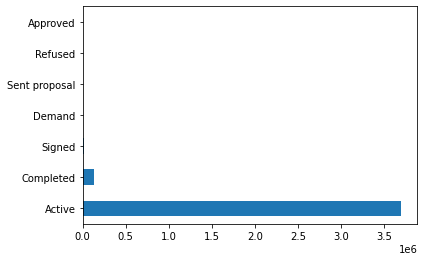

In [13]:
for i in cat_col:
    print("-"*100,"\n",i)
    cc[i].value_counts().plot.barh()
    plt.show()

## 3.2 Create Agregation Fields
Here I create aggregation functions fields.

In [15]:
#convert months balnce to positive befor aggregation
cc['MONTHS_BALANCE'] = cc['MONTHS_BALANCE'].apply(lambda x:-x)

In [16]:
#let get minimum, maximum, average and standard deviation
fun_agg = ['min', 'max', 'mean','std']

agg_fun_df = cc.groupby('SK_ID_CURR')[num_col[3:]].agg(fun_agg)

#rename columns
agg_fun_df.columns = ["CC_{}_{}".format(c[0],c[1].upper()) for c in agg_fun_df.columns.values.tolist()] 

#let fill nan values
agg_fun_df.fillna(0,inplace=True)

In [17]:
agg_fun_df.head()

,CC_AMT_BALANCE_MIN,CC_AMT_BALANCE_MAX,CC_AMT_BALANCE_MEAN,CC_AMT_BALANCE_STD,CC_AMT_CREDIT_LIMIT_ACTUAL_MIN,CC_AMT_CREDIT_LIMIT_ACTUAL_MAX,CC_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_AMT_CREDIT_LIMIT_ACTUAL_STD,CC_AMT_DRAWINGS_ATM_CURRENT_MIN,CC_AMT_DRAWINGS_ATM_CURRENT_MAX,...,CC_CNT_INSTALMENT_MATURE_CUM_MEAN,CC_CNT_INSTALMENT_MATURE_CUM_STD,CC_SK_DPD_MIN,CC_SK_DPD_MAX,CC_SK_DPD_MEAN,CC_SK_DPD_STD,CC_SK_DPD_DEF_MIN,CC_SK_DPD_DEF_MAX,CC_SK_DPD_DEF_MEAN,CC_SK_DPD_DEF_STD
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100006,0.0,0.00,0.000000,0.000000,270000,270000,270000.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000
100011,0.0,189000.00,54482.111149,68127.238270,90000,180000,164189.189189,34482.743620,0.0,180000.0,...,25.767123,10.288236,0,0,0.000000,0.000000,0,0,0.000000,0.000000
100013,0.0,161420.22,18159.919219,43237.406997,45000,157500,131718.750000,47531.585759,0.0,157500.0,...,18.719101,5.852328,0,1,0.010417,0.102062,0,1,0.010417,0.102062
100021,0.0,0.00,0.000000,0.000000,675000,675000,675000.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000
100023,0.0,0.00,0.000000,0.000000,45000,225000,135000.000000,96214.047088,0.0,0.0,...,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000


In [18]:
agg_fun_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CC_AMT_BALANCE_MIN,103558.0,10542.130509,44311.662362,-420250.185000,0.0,0.000000,0.000000,8.698735e+05
CC_AMT_BALANCE_MAX,103558.0,142297.932093,171325.542574,0.000000,0.0,96107.175000,194612.546250,1.505902e+06
CC_AMT_BALANCE_MEAN,103558.0,69973.192455,107537.810551,-2930.232558,0.0,24997.602995,96997.746023,9.286863e+05
CC_AMT_BALANCE_STD,103558.0,45479.925644,59330.665696,0.000000,0.0,26979.447713,66616.518984,5.864576e+05
CC_AMT_CREDIT_LIMIT_ACTUAL_MIN,103558.0,149529.205856,198557.625604,0.000000,9000.0,45000.000000,202500.000000,1.350000e+06
...,...,...,...,...,...,...,...,...
CC_SK_DPD_STD,103558.0,4.981618,46.174239,0.000000,0.0,0.000000,0.000000,9.196050e+02
CC_SK_DPD_DEF_MIN,103558.0,0.004423,1.423225,0.000000,0.0,0.000000,0.000000,4.580000e+02
CC_SK_DPD_DEF_MAX,103558.0,0.812424,26.177042,0.000000,0.0,0.000000,0.000000,3.260000e+03
CC_SK_DPD_DEF_MEAN,103558.0,0.151713,11.105665,0.000000,0.0,0.000000,0.000000,1.635685e+03


---------------------------------------------------------------------------------------------------- 
 CC_AMT_BALANCE_MIN


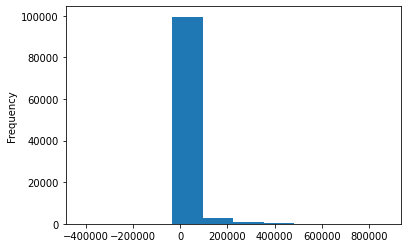

---------------------------------------------------------------------------------------------------- 
 CC_AMT_BALANCE_MAX


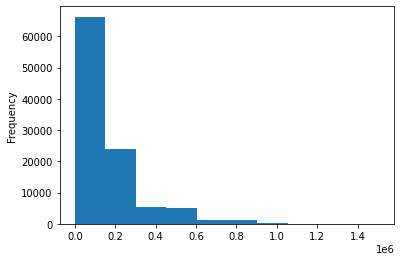

---------------------------------------------------------------------------------------------------- 
 CC_AMT_BALANCE_MEAN


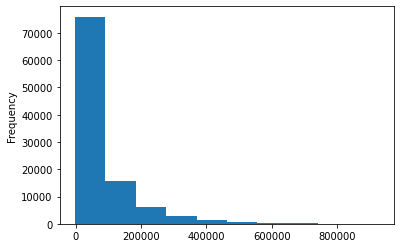

---------------------------------------------------------------------------------------------------- 
 CC_AMT_BALANCE_STD


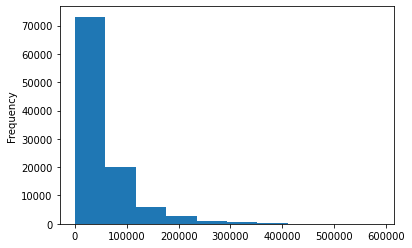

---------------------------------------------------------------------------------------------------- 
 CC_AMT_CREDIT_LIMIT_ACTUAL_MIN


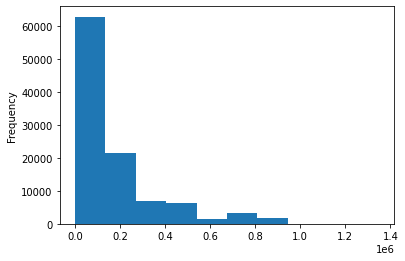

---------------------------------------------------------------------------------------------------- 
 CC_AMT_CREDIT_LIMIT_ACTUAL_MAX


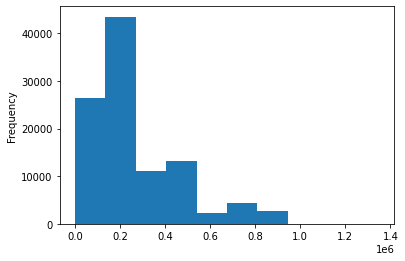

---------------------------------------------------------------------------------------------------- 
 CC_AMT_CREDIT_LIMIT_ACTUAL_MEAN


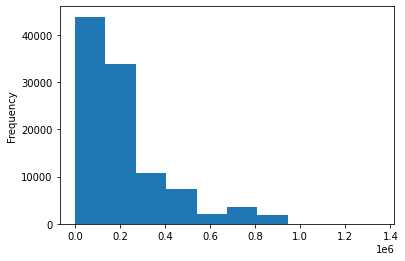

---------------------------------------------------------------------------------------------------- 
 CC_AMT_CREDIT_LIMIT_ACTUAL_STD


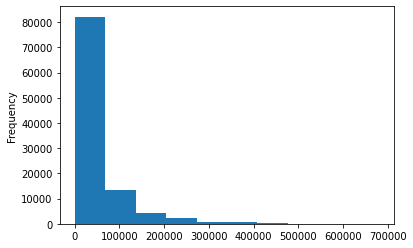

---------------------------------------------------------------------------------------------------- 
 CC_AMT_DRAWINGS_ATM_CURRENT_MIN


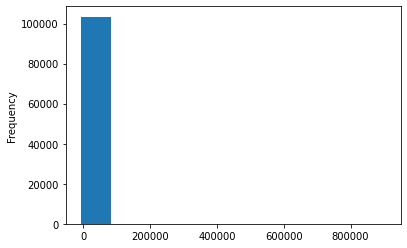

---------------------------------------------------------------------------------------------------- 
 CC_AMT_DRAWINGS_ATM_CURRENT_MAX


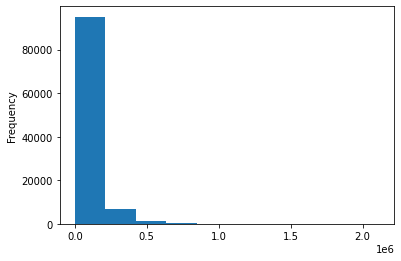

---------------------------------------------------------------------------------------------------- 
 CC_AMT_DRAWINGS_ATM_CURRENT_MEAN


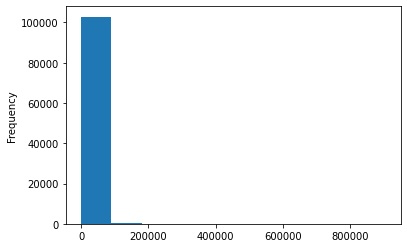

---------------------------------------------------------------------------------------------------- 
 CC_AMT_DRAWINGS_ATM_CURRENT_STD


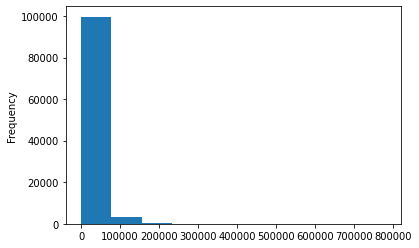

---------------------------------------------------------------------------------------------------- 
 CC_AMT_DRAWINGS_CURRENT_MIN


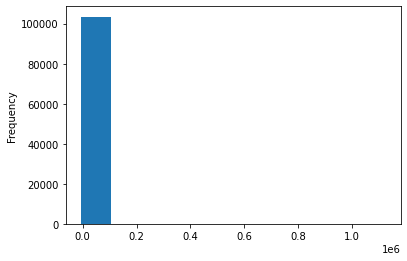

---------------------------------------------------------------------------------------------------- 
 CC_AMT_DRAWINGS_CURRENT_MAX


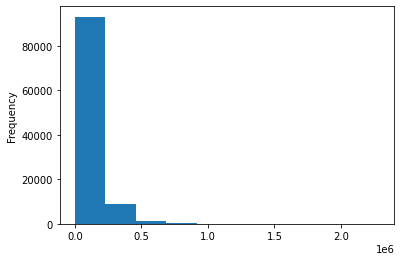

---------------------------------------------------------------------------------------------------- 
 CC_AMT_DRAWINGS_CURRENT_MEAN


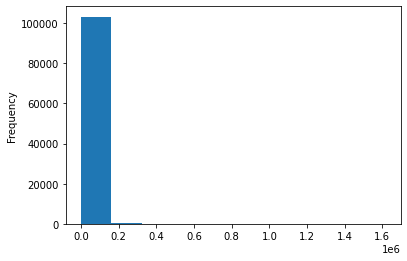

---------------------------------------------------------------------------------------------------- 
 CC_AMT_DRAWINGS_CURRENT_STD


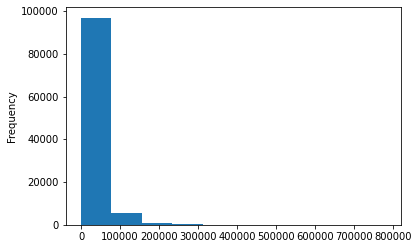

---------------------------------------------------------------------------------------------------- 
 CC_AMT_DRAWINGS_OTHER_CURRENT_MIN


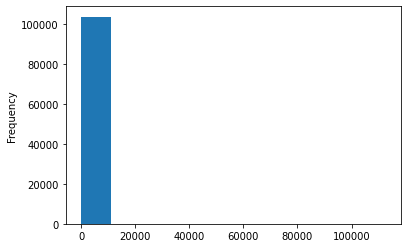

---------------------------------------------------------------------------------------------------- 
 CC_AMT_DRAWINGS_OTHER_CURRENT_MAX


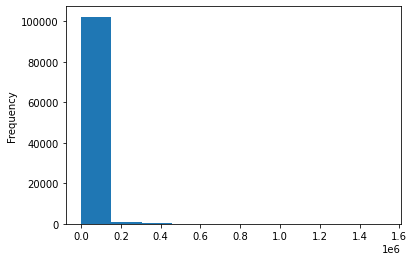

---------------------------------------------------------------------------------------------------- 
 CC_AMT_DRAWINGS_OTHER_CURRENT_MEAN


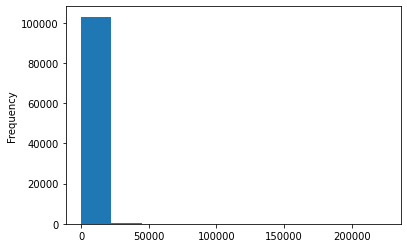

---------------------------------------------------------------------------------------------------- 
 CC_AMT_DRAWINGS_OTHER_CURRENT_STD


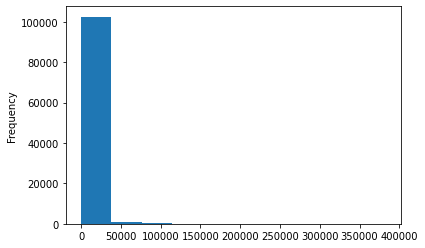

---------------------------------------------------------------------------------------------------- 
 CC_AMT_DRAWINGS_POS_CURRENT_MIN


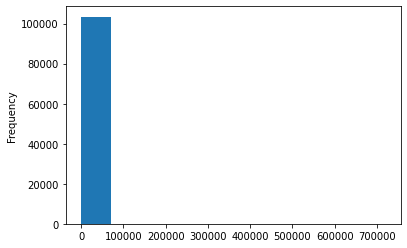

---------------------------------------------------------------------------------------------------- 
 CC_AMT_DRAWINGS_POS_CURRENT_MAX


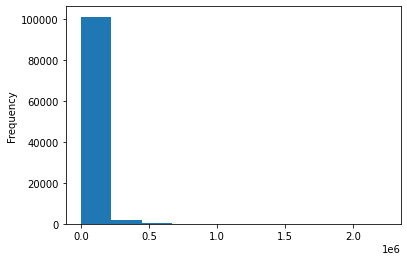

---------------------------------------------------------------------------------------------------- 
 CC_AMT_DRAWINGS_POS_CURRENT_MEAN


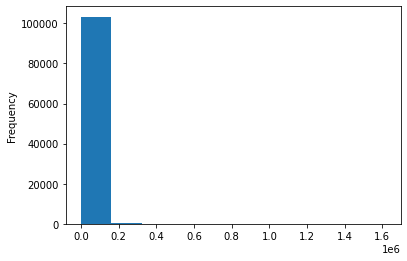

---------------------------------------------------------------------------------------------------- 
 CC_AMT_DRAWINGS_POS_CURRENT_STD


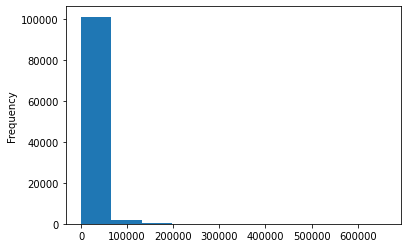

---------------------------------------------------------------------------------------------------- 
 CC_AMT_INST_MIN_REGULARITY_MIN


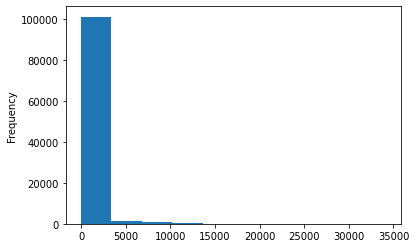

---------------------------------------------------------------------------------------------------- 
 CC_AMT_INST_MIN_REGULARITY_MAX


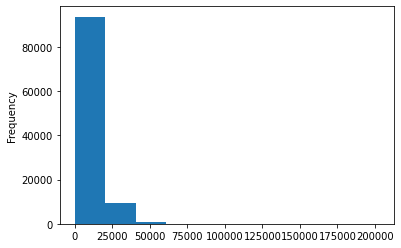

---------------------------------------------------------------------------------------------------- 
 CC_AMT_INST_MIN_REGULARITY_MEAN


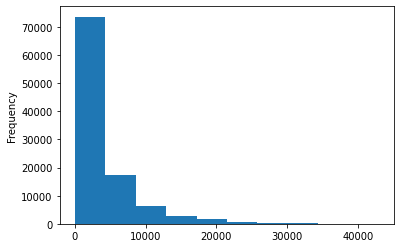

---------------------------------------------------------------------------------------------------- 
 CC_AMT_INST_MIN_REGULARITY_STD


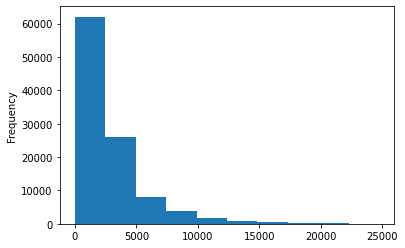

---------------------------------------------------------------------------------------------------- 
 CC_AMT_PAYMENT_CURRENT_MIN


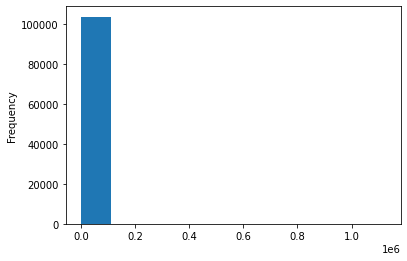

---------------------------------------------------------------------------------------------------- 
 CC_AMT_PAYMENT_CURRENT_MAX


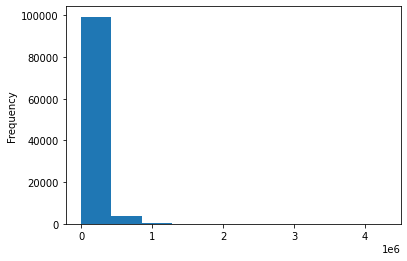

---------------------------------------------------------------------------------------------------- 
 CC_AMT_PAYMENT_CURRENT_MEAN


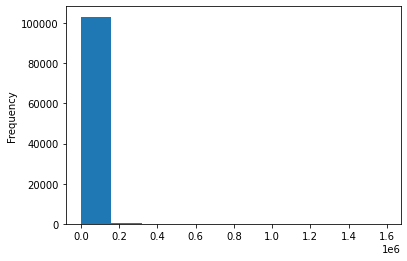

---------------------------------------------------------------------------------------------------- 
 CC_AMT_PAYMENT_CURRENT_STD


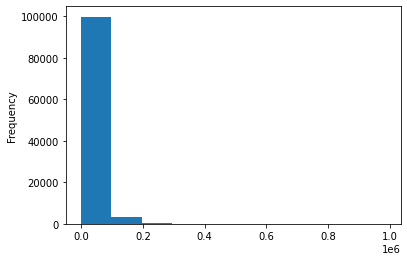

---------------------------------------------------------------------------------------------------- 
 CC_AMT_PAYMENT_TOTAL_CURRENT_MIN


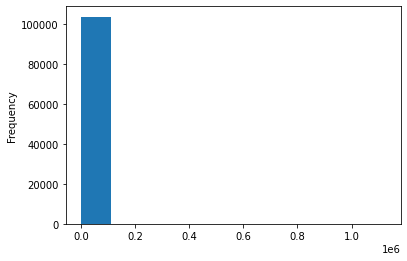

---------------------------------------------------------------------------------------------------- 
 CC_AMT_PAYMENT_TOTAL_CURRENT_MAX


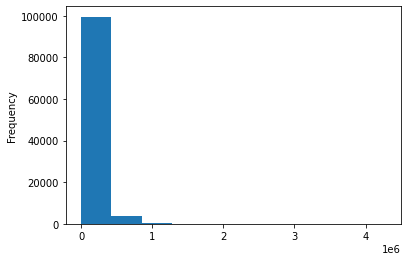

---------------------------------------------------------------------------------------------------- 
 CC_AMT_PAYMENT_TOTAL_CURRENT_MEAN


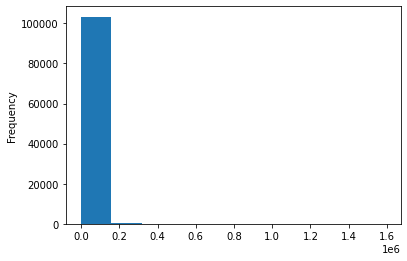

---------------------------------------------------------------------------------------------------- 
 CC_AMT_PAYMENT_TOTAL_CURRENT_STD


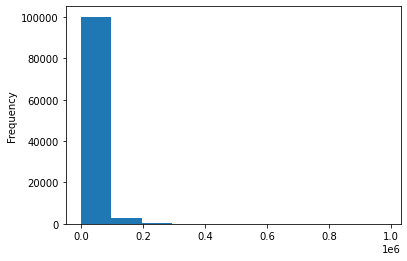

---------------------------------------------------------------------------------------------------- 
 CC_AMT_RECEIVABLE_PRINCIPAL_MIN


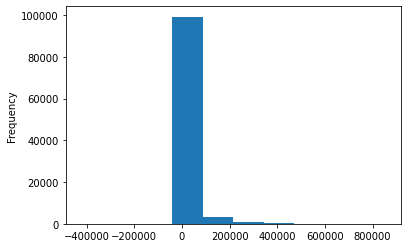

---------------------------------------------------------------------------------------------------- 
 CC_AMT_RECEIVABLE_PRINCIPAL_MAX


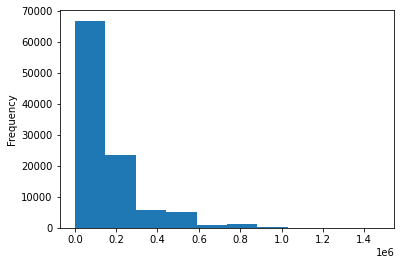

---------------------------------------------------------------------------------------------------- 
 CC_AMT_RECEIVABLE_PRINCIPAL_MEAN


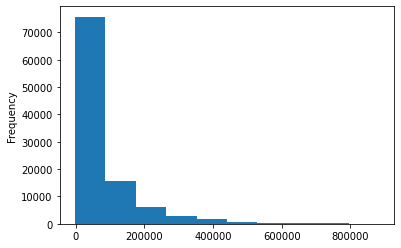

---------------------------------------------------------------------------------------------------- 
 CC_AMT_RECEIVABLE_PRINCIPAL_STD


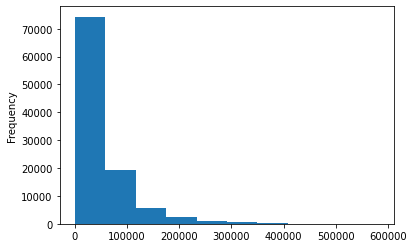

---------------------------------------------------------------------------------------------------- 
 CC_AMT_RECIVABLE_MIN


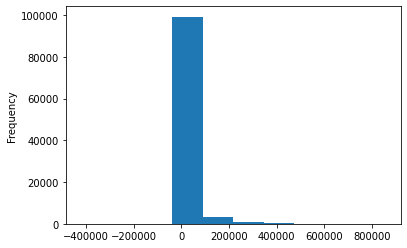

---------------------------------------------------------------------------------------------------- 
 CC_AMT_RECIVABLE_MAX


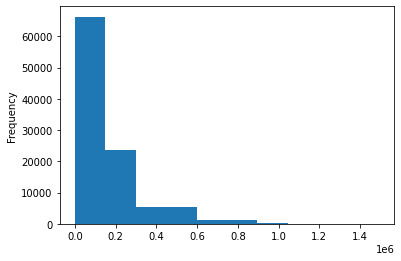

---------------------------------------------------------------------------------------------------- 
 CC_AMT_RECIVABLE_MEAN


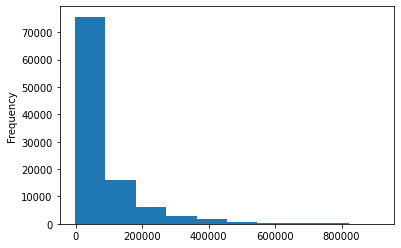

---------------------------------------------------------------------------------------------------- 
 CC_AMT_RECIVABLE_STD


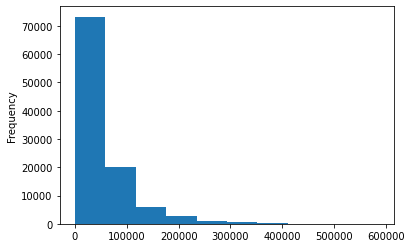

---------------------------------------------------------------------------------------------------- 
 CC_AMT_TOTAL_RECEIVABLE_MIN


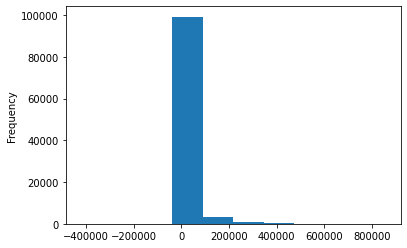

---------------------------------------------------------------------------------------------------- 
 CC_AMT_TOTAL_RECEIVABLE_MAX


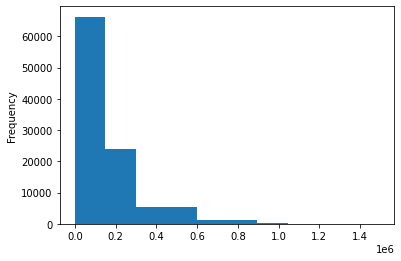

---------------------------------------------------------------------------------------------------- 
 CC_AMT_TOTAL_RECEIVABLE_MEAN


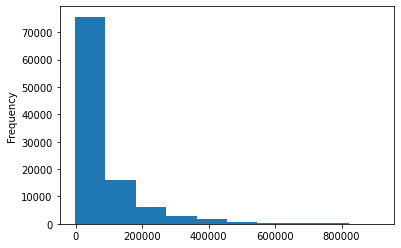

---------------------------------------------------------------------------------------------------- 
 CC_AMT_TOTAL_RECEIVABLE_STD


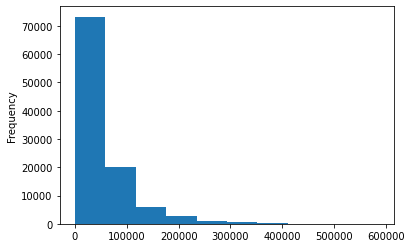

---------------------------------------------------------------------------------------------------- 
 CC_CNT_DRAWINGS_ATM_CURRENT_MIN


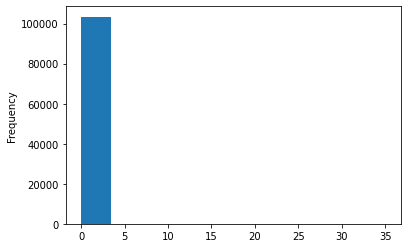

---------------------------------------------------------------------------------------------------- 
 CC_CNT_DRAWINGS_ATM_CURRENT_MAX


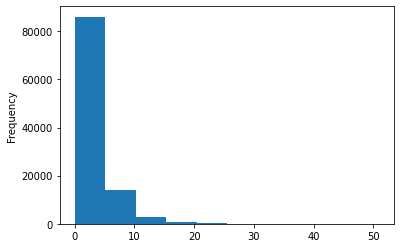

---------------------------------------------------------------------------------------------------- 
 CC_CNT_DRAWINGS_ATM_CURRENT_MEAN


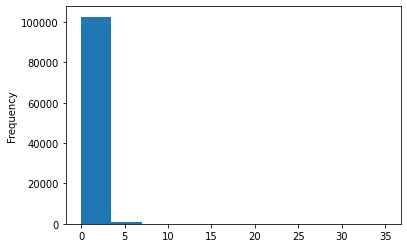

---------------------------------------------------------------------------------------------------- 
 CC_CNT_DRAWINGS_ATM_CURRENT_STD


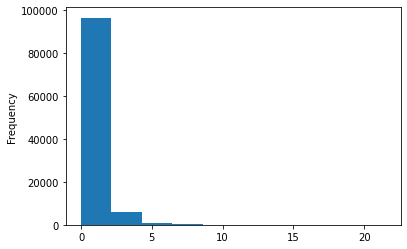

---------------------------------------------------------------------------------------------------- 
 CC_CNT_DRAWINGS_CURRENT_MIN


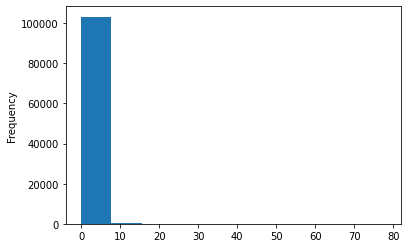

---------------------------------------------------------------------------------------------------- 
 CC_CNT_DRAWINGS_CURRENT_MAX


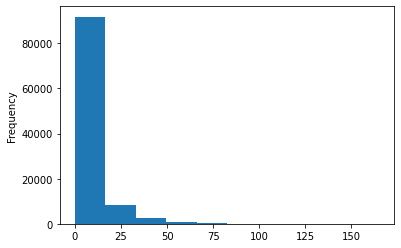

---------------------------------------------------------------------------------------------------- 
 CC_CNT_DRAWINGS_CURRENT_MEAN


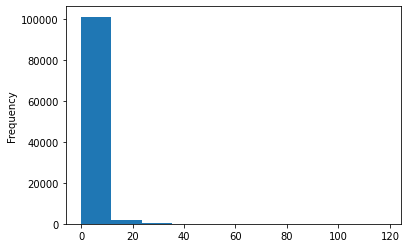

---------------------------------------------------------------------------------------------------- 
 CC_CNT_DRAWINGS_CURRENT_STD


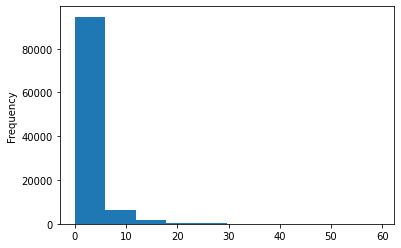

---------------------------------------------------------------------------------------------------- 
 CC_CNT_DRAWINGS_OTHER_CURRENT_MIN


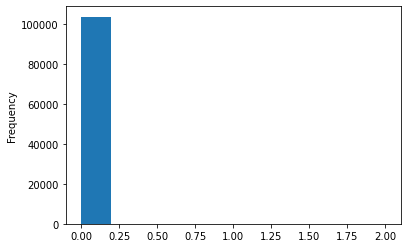

---------------------------------------------------------------------------------------------------- 
 CC_CNT_DRAWINGS_OTHER_CURRENT_MAX


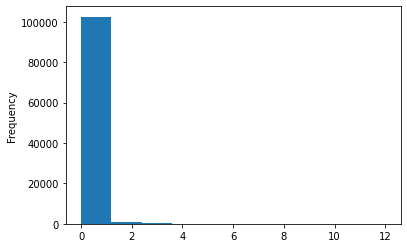

---------------------------------------------------------------------------------------------------- 
 CC_CNT_DRAWINGS_OTHER_CURRENT_MEAN


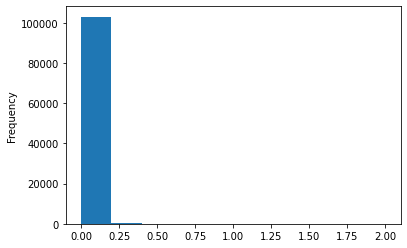

---------------------------------------------------------------------------------------------------- 
 CC_CNT_DRAWINGS_OTHER_CURRENT_STD


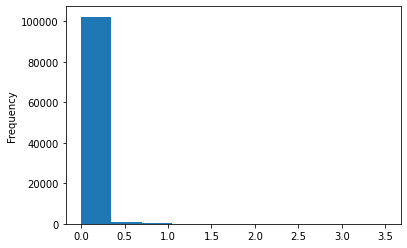

---------------------------------------------------------------------------------------------------- 
 CC_CNT_DRAWINGS_POS_CURRENT_MIN


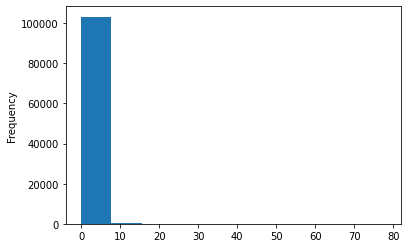

---------------------------------------------------------------------------------------------------- 
 CC_CNT_DRAWINGS_POS_CURRENT_MAX


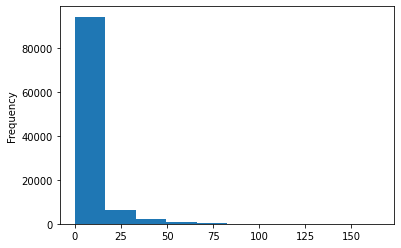

---------------------------------------------------------------------------------------------------- 
 CC_CNT_DRAWINGS_POS_CURRENT_MEAN


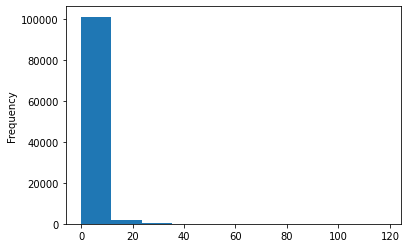

---------------------------------------------------------------------------------------------------- 
 CC_CNT_DRAWINGS_POS_CURRENT_STD


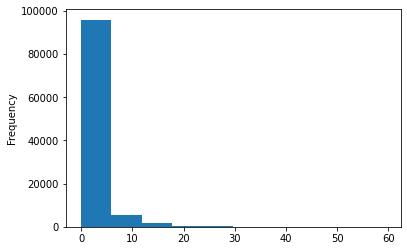

---------------------------------------------------------------------------------------------------- 
 CC_CNT_INSTALMENT_MATURE_CUM_MIN


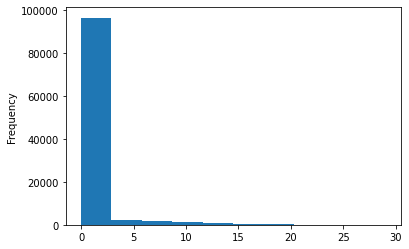

---------------------------------------------------------------------------------------------------- 
 CC_CNT_INSTALMENT_MATURE_CUM_MAX


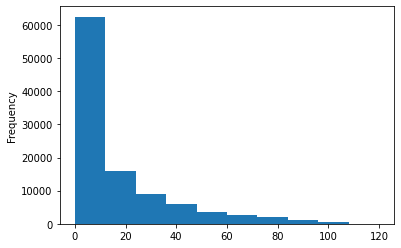

---------------------------------------------------------------------------------------------------- 
 CC_CNT_INSTALMENT_MATURE_CUM_MEAN


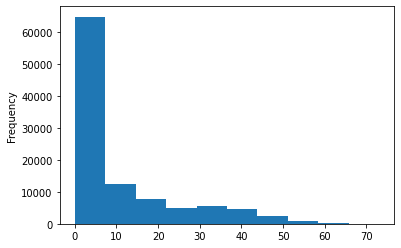

---------------------------------------------------------------------------------------------------- 
 CC_CNT_INSTALMENT_MATURE_CUM_STD


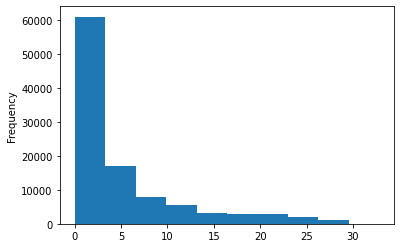

---------------------------------------------------------------------------------------------------- 
 CC_SK_DPD_MIN


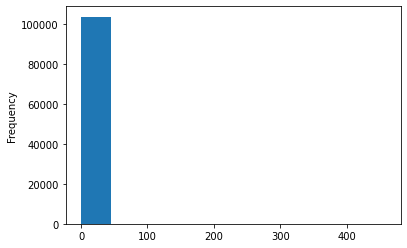

---------------------------------------------------------------------------------------------------- 
 CC_SK_DPD_MAX


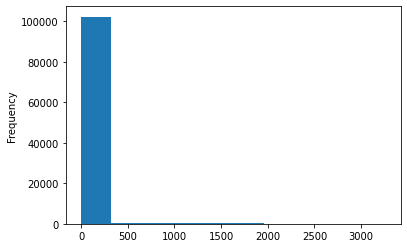

---------------------------------------------------------------------------------------------------- 
 CC_SK_DPD_MEAN


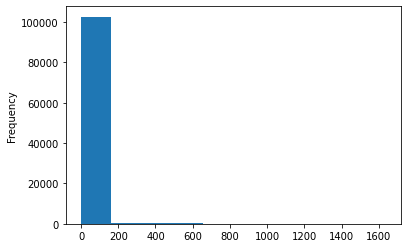

---------------------------------------------------------------------------------------------------- 
 CC_SK_DPD_STD


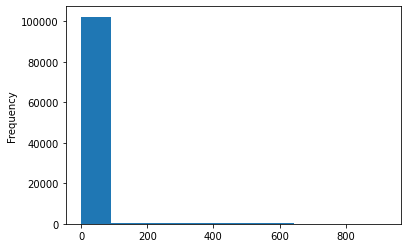

---------------------------------------------------------------------------------------------------- 
 CC_SK_DPD_DEF_MIN


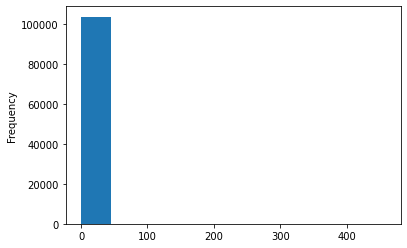

---------------------------------------------------------------------------------------------------- 
 CC_SK_DPD_DEF_MAX


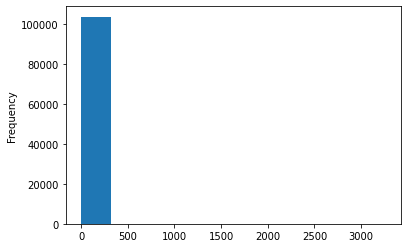

---------------------------------------------------------------------------------------------------- 
 CC_SK_DPD_DEF_MEAN


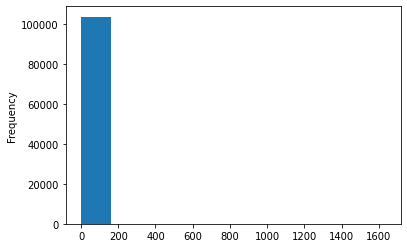

---------------------------------------------------------------------------------------------------- 
 CC_SK_DPD_DEF_STD


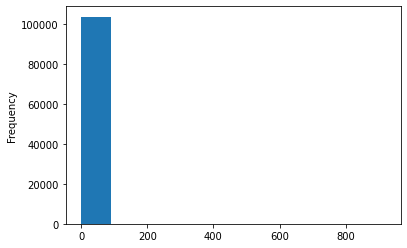

In [21]:
for i in agg_fun_df.columns:
    print("-"*100,"\n",i)
    agg_fun_df[i].plot.hist()
    plt.show()

In [24]:
agg_fun_df.reset_index().to_csv(r'C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\results\1_3_cc_balances.csv',index=False)